## 3. Study of feature relevance and feature selection

In this last section, using different criteria, you have to analyze the relevance of the input features. Thus, you will have to find a subset with the $D'$ most relevant features and, using this subset of features, analyze the final performance of a regressor (for the sake of simplicity, consider a linear ridge regressor as final regressor).

To analyze the feature importances or relevances, you can use the following criteria:

1. **Relevance ranking based on the validation error**: if there were $D$ input features, we could try to train $D$ regressors where each regressor uses one (and only one) different input feature. According to the final perfomance of each regressor (evaluated on a validation set or with a CV proccess), we could rank the features (the most relevant feature is the one providing the lowest error). Using this ranking, we can select the $D'$ most relevant features as the $D'$ top-ranked ones. Note that this scheme only analyzes the isolated relevance of each feature to predict the output; so, it is said that this approach is *univariate*.

 <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/FeatureRanking.png" width="90%" > 


2. **Greedy search based on the validation error**: approach (1) has the disadvantage of not taking into account relationships between features. For instance, method (1) would not realize that two features can be rendundant or that a feature, that is useless by itself, can be very useful combined with another feature. To overcome this drawback, we should have to analyze subsets of features; however, exploring all possible subsets  is usually computationally unflexible (there are $2^D$ combinations!!!!); so a greedy search (fordward or backward) is usually prefered:

  2.1 *Fordward search*: It starts with an empty set and, iteratively, adds new features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Forward_search.png" width="48%" > 

  2.2 *Backward search*: It starts considering all the features and, iteratively, removes features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Backward_search.png" width="48%" > 

3. **Ridge linear regression with a prunning**: We know that the L2 regularization limits the magnitude of the weight vector to avoid overfitting problems, but these weigths do not become to null. However, in a linear model, *the weight magnitude can be an indicative of the feature relevance* and, unlike approach (1), all features are analyzed at the same time (*multivariate approach*). Use the weigth magnitude to generate a ranking of features and, later, use this ranking to select the $D'$ most relevant features.

4. **Lasso linear regression**: In this case, the L1 penalty allows us to directly eliminate some of the input features. Explore different values of the regularization parameter $\lambda$ to get a sequence of selected feature sets (from a single feature to all features).


5. **Elastic-net linear regression**: This last approach combines L1 and L2 regularizations, thus including the advantages of both methods. Varying adequately their regularization parameters, create a sequence of feature selection subsets. 



Final comments:

* Due to part of the feature selection process involves selecting the optimum number of features, to avoid additional complexity (having to validate this number), you can analyze the different methods by exploring the curves of MSE vs. number of selected features ($D'$).

* It is not necessary to apply all these methods to complete this notebook (you can choose, at least, three of them). In fact, the implementation of greedy search approaches require an advanced knowledge of Python; so take this into account when you design your notebook solution.

* **Please, analyze in detail the different results, pointing out the advantages/disadvantages of each feature selection scheme**. Think about the behaviour of the different criteria in cases where a feature is irrelevant or there are redundant features. Additional experiments helping you to support any of your conclusions will be welcome.

--------------------------------------------------------------------------------------------------------------------------

### Evaluating of the results of feature selection
Just at the end of the previous section, we saw that the best result (over the test set) was 0.437 (R2 score) for the linear unregularized regressor. For that regressor, we were using all available features. Therefore, using less features in this section it is not possible to get a better result than that one, and our aim is to obtain scores close to that one but using a lower number of features.

### Method 4 : Feature selection with Lasso linear regression
With Lasso (L1) regularization, some of the weigths usually tend to zero. Therefore, it can be used for feature selection. Let's start with this method in order to identify the most relevant features.

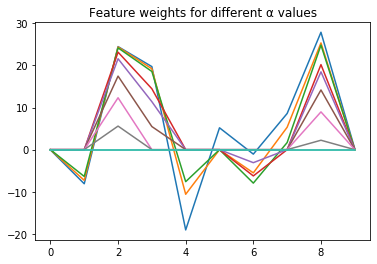

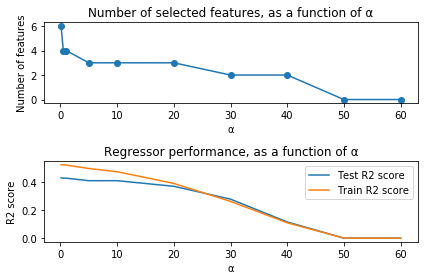

In [35]:
import sklearn.linear_model as ln

rang_alpha = [0.1,0.5,1,5,10,20,30,40,50,60] # From the polynomial regression section, this is the alpha range in which best results are obtained

weights = np.zeros((len(rang_alpha),X_train.shape[1]))
threshold = 0
features_selected = np.zeros((len(rang_alpha),X_train.shape[1]))
n_features = np.zeros((len(rang_alpha),))
test_score = np.zeros((len(rang_alpha),))
train_score = np.zeros((len(rang_alpha),))

plt.plot()
for (i,a) in enumerate(rang_alpha):
    lasso = ln.Lasso(fit_intercept=True,alpha=a).fit(X_train,Y_train)
    weights[i,:] = lasso.coef_
    features_selected[i,:] = lasso.coef_ > threshold
    n_features[i] = np.sum(features_selected[i,:])
    test_score[i] = lasso.score(X_test,Y_test)
    train_score[i] = lasso.score(X_train,Y_train)
    plt.plot(lasso.coef_,label='alpha = '+str(a))

plt.title('Feature weights for different \u03B1 values')
plt.show()

plt.figure()
plt.subplot(211)
plt.title('Number of selected features, as a function of \u03B1')
plt.plot(rang_alpha,n_features,'o-',label='Number of features')
plt.ylabel('Number of features')
plt.xlabel('\u03B1')


plt.subplot(212)
plt.plot(rang_alpha,test_score,label='Test R2 score')
plt.plot(rang_alpha,train_score,label='Train R2 score')
plt.title('Regressor performance, as a function of \u03B1')
plt.ylabel('R2 score')
plt.xlabel('\u03B1')
plt.legend()
plt.tight_layout()
plt.show()

From the first plot, we can easily see that features 2 and 8 are the most relevant. And features 0, 1, 4, 5, 7 and 9 are irrelevant (weight to zero) for most alphas, except low values.

In the second plot (upper part), it is easy to see how increasing alpha yields a lower number number of selected features, i.e. more weights go to zero. But also the performance of the regressor gets worse. Nevertheless, we can see that reducing to 3 or 4 features, the regressor still yields a good performance, close to the optimal performance of 0.43 yield by the linear regressor at the end of section 2.

For example, let's select the first alpha for which the model already only uses 3 features, $\alpha$ = 5.

In [5]:
a = 5 
i = 3
features = np.where(features_selected[i,:] == 1)[0]
lasso = ln.Lasso(fit_intercept=True,alpha = 5).fit(X_train,Y_train)
print('The performance with features %d, %d and %d (%s, %s and %s):' %(features[0],features[1],features[2],feature_names[features[0]],feature_names[features[1]],feature_names[features[2]]))
print('\tTrain R2 score %.3f. Test R2 score %.3f.' %(lasso.score(X_train,Y_train),lasso.score(X_test,Y_test)))

The performance with features 2, 3 and 8 (bmi, bp and s5):
	Train R2 score 0.500. Test R2 score 0.413.


We can see that the selected features are 2, 3 and 8, what could already be predicted from the first graph above. And the test score it yields is quite close to the 0.437 of the linear regressor with all features. Therefore, we can conclude that these 3 features are providing most of the information needed to predict the output, and therefore these 3 patient characteristics (BMI, blood pressure and S5) are the most relevant to measure in order to predict diabetes progression.

The main advantage of this method is that it is multivariate, as it takes into account all features, before setting the more suitable values for the weights. Therefore, it is able to exploit relationships between features.

The main disadvantage of this method is that it can be quite "agressive" for large values of $\alpha$, eliminating too many features and overly decreasing the performance of the regressor. Therefore, the value of $\alpha$ must be carefully cross-validated, inspecting the evolution of the validation score against the value of $\alpha$, and selecting an adecuate trade-off between eliminating features of low relevance and not overly decreasing performance.

### Method 2.1 : Forward search

In [25]:
from sklearn.model_selection import GridSearchCV

# Let's define how many features we want to select
features_to_select = 10

# We are going to use a Ridge (L2 regularization) regressor.
# Therefore, we have to define possible alpha values
rang_alpha = [0.1,0.5,1,5,10,20,30,50,70, 100, 200, 300, 500] 
parameters = {'alpha':rang_alpha}

n_features = X_train.shape[1]
selected_features = []  # initialize, there are no selected features at the beginning
X_partitions = [None]*n_features  # Creates a list, to contain the different versions (combinations of features) of the training set
regressors = [None]*n_features  # list to contain all regressors in an iteration
scores = np.zeros((n_features,))  # An array that will contain the test score of each feature

best_regressors = []  # save the best regressor in each iteration
validation_scores = [] # and their (validation) score


for fts in range(features_to_select):
    
    for f in range(n_features):
        # Iterate along all features, and create a new training matrix with all data points, 
        # and features f and selected features (which are those selected in previous iterations of the outer loop)
        
        # This is the new training matrix. It has columns =  #selected_features + 1, to allow to include also feature "f"
        X_sel = np.ones((X_train.shape[0],len(selected_features)+1)) 
        
        # Include the already selected features
        for (i,sf) in enumerate(selected_features):
            X_sel[:,i] = X_train[:,sf]  # Create a matrix containing the previously selected features
            
        # Include the new feature, only if it is not already one of the selected features
        if ((f in selected_features)==False):
            X_sel[:,-1] = X_train[:,f]  # Add each of the other (distint) features
        # Else, if that feature has already been selected, keep the last column full of ones
        
        # For the selected data, and different values of alpha, perform cross-validated search
        clf = GridSearchCV(ln.Ridge(),parameters,cv=10,iid=False).fit(X_sel,Y_train)
        # Find the score of the best performing alpha, that is, the best that adding this feature can provide
        scores[f] = clf.cv_results_['mean_test_score'][np.where(clf.cv_results_['rank_test_score']==1)[0][0] ]
        regressors[f] = clf.best_estimator_

    # The feature with the highest score (the one left at the end when sorting scores) is added to the selected features
    best_feature = np.argsort(scores)[-1]
    selected_features.append(best_feature)
    validation_scores.append(scores[best_feature])
    best_regressors.append(regressors[best_feature])
    
    print(selected_features)

[2]
[2, 8]
[2, 8, 3]
[2, 8, 3, 4]
[2, 8, 3, 4, 1]
[2, 8, 3, 4, 1, 7]
[2, 8, 3, 4, 1, 7, 8]
[2, 8, 3, 4, 1, 7, 8, 8]
[2, 8, 3, 4, 1, 7, 8, 8, 8]
[2, 8, 3, 4, 1, 7, 8, 8, 8, 8]


The obtained result is exactly the same than the one obtained before, with method 4. The same features get selected first. Moreover, we can see in which order they are selected, what can also be of interest. And the last four selected features are in fact not such, as the method estimates that not including any feature provides better performance that in fact including features 0, 5, 6 and 9.

Now, let's plot the evolution of R2 scores when we progresively add more features:

[2, 8, 3, 4, 1, 7, 8, 8, 8, 8]


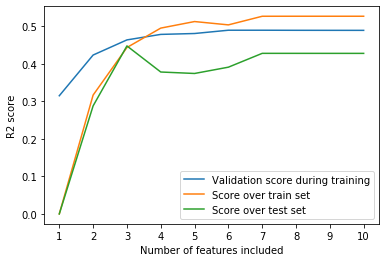

In [26]:
print(selected_features)
n = len(selected_features)
test_scores = np.zeros((n,))
train_scores = np.zeros((n,))

for i in range(n):
    X_train_sel = np.zeros((X_train.shape[0],i+1))
    X_test_sel = np.zeros((X_test.shape[0],i+1))
    for b in range(i):
        X_train_sel[:,b] = X_train[:,selected_features[b]]
        X_test_sel[:,b] = X_test[:,selected_features[b]]
    
    test_scores[i] = best_regressors[i].score(X_test_sel,Y_test)
    train_scores[i]= best_regressors[i].score(X_train_sel,Y_train)

plt.figure()
x = np.arange(n)+1
plt.plot(x,validation_scores,label='Validation score during training')
plt.plot(x,train_scores,label='Score over train set')
plt.plot(x,test_scores,label='Score over test set')
plt.xticks(ticks=x)
plt.xlabel('Number of features included')
plt.ylabel('R2 score')
plt.legend()
plt.show()

It is possible to see that by choosing 3 features we are already very close to the score provided by the linear regressor with all features. This results confirms the one provided by Method 4.

The train and validation scores are monotonically increasing, and the largest increase happens for the first 3 or 4 features. Over the test set, we see an abnormal decrease after including a fourth feature. This is probably due to dissimilarities between the test and training sets. Moreover, such dissimilarities are very likely when we have a small dataset.

This method could be considered univariate, as it selects features one by one. Although subsequent features are selected on combination with the ones previously selected, this method could potentially skip a combination of several features with low individual relevance but that perform well together. This is the main drawback of this method.

### Method 3 : Feature selection with Ridge linear regression
At the beggining of this section, we used Lasso (L1 regularization) linear regression, which tends to set weights to zero, and therefore is selecting features. Another possible approach is to use Ridge (L2 regularization) linear regression. This method does not set weights to zero, but less relevant features will have weights of lower absolute magnitude (remember that data values have been normalized across features, so the weights do not need to "scale" the input).

Therefore, we can simply sort the weights arising from a Ridge linear regression in order to select the most relevant features.

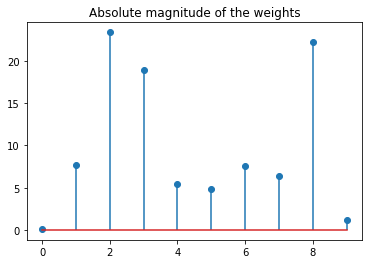

In [27]:
ridge = GridSearchCV(ln.Ridge(),parameters,iid=False,cv=10).fit(X_train,Y_train).best_estimator_
w = ridge.coef_
plt.stem(np.abs(w),use_line_collection=True)
plt.title('Absolute magnitude of the weights')
plt.show()

The result of this method is very similar to the previous ones. Features 2, 3 and 8 have the largest weights meanwhile features 1, 4, 5, 6 and 7 have low weights and features 0 and 9 have extremely low weights. 

Now, let's plot the evolution of the performance of the Ridge regressor as we introduce the features in the order of their weight magnitude:

[2 8 3 1 6 7 4 5 9 0]


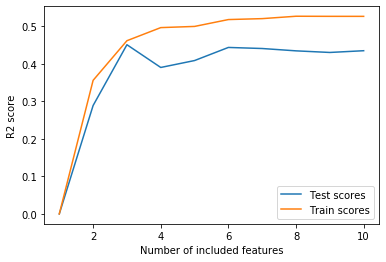

In [28]:
sorted_features = np.flip(np.argsort(np.abs(w)))
print(sorted_features)

n = len(sorted_features)
test_scores = np.zeros((n,))
train_scores = np.zeros((n,))

for i in range(n):
    X_train_sel = np.zeros((X_train.shape[0],i+1))
    X_test_sel = np.zeros((X_test.shape[0],i+1))
    for b in range(i):
        X_train_sel[:,b] = X_train[:,sorted_features[b]]
        X_test_sel[:,b] = X_test[:,sorted_features[b]]
    
    ridge = GridSearchCV(ln.Ridge(),parameters,iid=False,cv=10).fit(X_train_sel,Y_train).best_estimator_
    test_scores[i] = ridge.score(X_test_sel,Y_test)
    train_scores[i]= ridge.score(X_train_sel,Y_train)    

plt.figure()
x = np.arange(n) + 1
plt.plot(x,test_scores,label='Test scores')
plt.plot(x,train_scores,label='Train scores')
plt.xlabel('Number of included features')
plt.ylabel('R2 score')
plt.legend()
plt.show()

We can see a similar performance to previous methods.

This approach is multivariate and it is able to exploit relationships between features. Nevertheless, it does not have the same tendency of L1 regularization to set weights to zero, and we can see that features 1, 4, 5, 6 and 7 have similar weight magnitude, and it is difficult to appropiately choose between them. In that aspect, this method could be considered "weaker" in terms of feature selection.

### Method 5 : ElasticNet feature selection
Finally, let's use ElasticNet linear regression, which incorporates both L1 and L2 regularization.

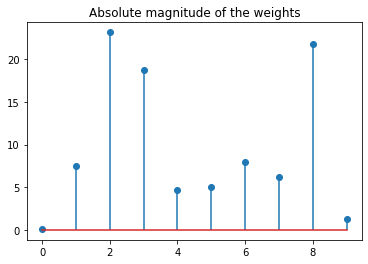

In [31]:
rang_alpha = [0.1,0.5,1,5,10,20,30,50,70, 100, 200, 300, 500] 
rang_ratio = np.arange(0.1,1,0.1)
parameters = {'alpha':rang_alpha,'l1_ratio':rang_ratio}

elasticnet = GridSearchCV(ln.ElasticNet(max_iter=10000000),parameters,iid=False,cv=10).fit(X_train,Y_train).best_estimator_
w = elasticnet.coef_
plt.stem(np.abs(w),use_line_collection=True)
plt.title('Absolute magnitude of the weights')
plt.show()

[2 8 3 6 1 7 5 4 9 0]


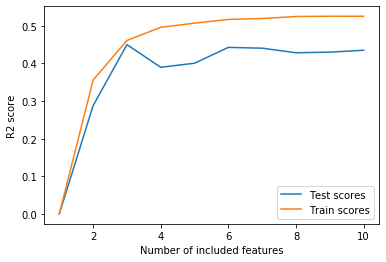

In [33]:
sorted_features = np.flip(np.argsort(np.abs(w)))
print(sorted_features)

n = len(sorted_features)
test_scores = np.zeros((n,))
train_scores = np.zeros((n,))

for i in range(n):
    X_train_sel = np.zeros((X_train.shape[0],i+1))
    X_test_sel = np.zeros((X_test.shape[0],i+1))
    for b in range(i):
        X_train_sel[:,b] = X_train[:,sorted_features[b]]
        X_test_sel[:,b] = X_test[:,sorted_features[b]]
    
    elasticnet = GridSearchCV(ln.ElasticNet(max_iter=10000000),parameters,iid=False,cv=10).fit(X_train_sel,Y_train).best_estimator_
    test_scores[i] = elasticnet.score(X_test_sel,Y_test)
    train_scores[i]= elasticnet.score(X_train_sel,Y_train)    

plt.figure()
x = np.arange(n) + 1
plt.plot(x,test_scores,label='Test scores')
plt.plot(x,train_scores,label='Train scores')
plt.xlabel('Number of included features')
plt.ylabel('R2 score')
plt.legend()
plt.show()

We can see that this method performs very similarly to all the previous. This could be expected: both L1 and L2 methods are yielding similar results, so a combination of them is likely to produce the same.

## Conclusions

In this homework, we have inspected the performance of linear regressors (and KNN) using linear features, polynomial features and feature selection.

About incorporating polynomial features, it did not yield an improvement in the performance in this case, but it largely increases computational costs, and the chances of overfitting, as sometimes we are incorporating too much flexibility to the model.

About feature selection, all methods used yielded similar results: features 2, 3 and 8 (BMI, blood pressure and S5, respectively) are the most relevant in order to predict disease progression. Also, no significant difference was observed between univariate and multivariate methods. Of all methods, L1 regression seems the most suitable as it sets many weights to zero even for low $\alpha$, while still keeping most of the performance.